# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sea
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 613
['buala', 'general pico', 'port-aux-francais', 'letterkenny', 'lompoc', 'puerto natales', 'zangguy', 'orchard homes', 'taiohae', 'grytviken', 'vadso', 'edinburgh of the seven seas', 'margaret river', 'papatowai', "mil'kovo", 'waitangi', 'bilibino', 'mount gambier', 'albany', 'wailua homesteads', 'colonia', 'caleta de carquin', 'bethel', 'lorengau', 'odobesti', 'invercargill', 'sisimiut', 'essaouira', 'chiredzi', 'adamstown', 'rabo de peixe', 'slavutych', 'saint-pierre', 'pacific grove', 'port mathurin', 'yellowknife', 'benghazi', 'waingapu', 'ribeira grande', 'puerto ayora', 'port elizabeth', 'iqaluit', 'thompson', 'stanley', 'college', 'columbia city', 'blackmans bay', 'ancud', 'jiwani', 'badger', 'queenstown', 'bredasdorp', 'severo-yeniseyskiy', 'uturoa', 'horta', 'isafjordur', 'antonio enes', 'saldanha', 'aginskoye', 'olonkinbyen', 'toliara', 'smithers', 'muynoq', "saksaul'skiy", 'atafu village', 'port alfred', 'mahina', 'ingeniero guillermo n. juar

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | buala
Processing Record 2 of Set 1 | general pico
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | letterkenny
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | zangguy
City not found. Skipping...
Processing Record 8 of Set 1 | orchard homes
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | vadso
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | mil'kovo
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | mount gambier
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | wailua homesteads
Processing Record

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,buala,-8.1450,159.5921,26.33,85,100,1.52,SB,1698067708
1,general pico,-35.6566,-63.7568,18.28,67,100,5.77,AR,1698067708
2,port-aux-francais,-49.3500,70.2167,1.77,95,95,10.38,TF,1698067709
3,letterkenny,54.9500,-7.7333,13.94,82,100,5.90,IE,1698067709
4,lompoc,34.6391,-120.4579,15.85,88,100,5.81,US,1698067611


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,buala,-8.1450,159.5921,26.33,85,100,1.52,SB,1698067708
1,general pico,-35.6566,-63.7568,18.28,67,100,5.77,AR,1698067708
2,port-aux-francais,-49.3500,70.2167,1.77,95,95,10.38,TF,1698067709
3,letterkenny,54.9500,-7.7333,13.94,82,100,5.90,IE,1698067709
4,lompoc,34.6391,-120.4579,15.85,88,100,5.81,US,1698067611


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

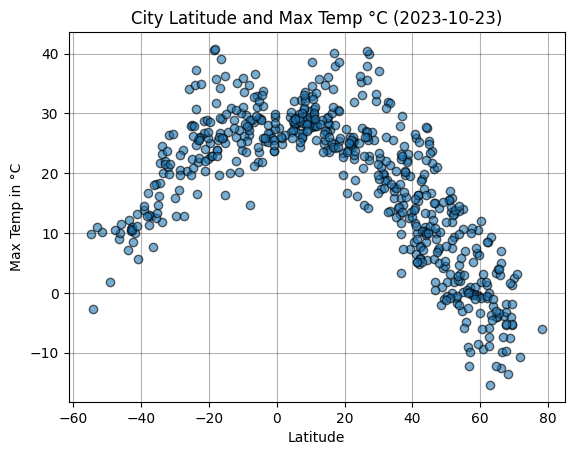

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],
            alpha = 0.6,
            edgecolors = "black")


# Incorporate the other graph properties
plt.grid(axis = "both", color = "black", alpha = 0.3)
plt.xlabel("Latitude")
plt.ylabel("Max Temp in °C")
current_date = datetime.now().strftime("%Y-%m-%d")
plt.title(f"City Latitude and Max Temp °C ({current_date})")

# Save the figure
plt.savefig("output_data/Fig1(Lat vs Temp).png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

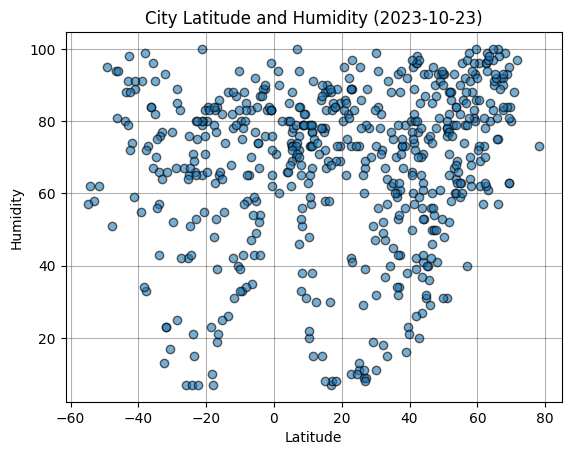

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],
            alpha = 0.6,
            edgecolors = "black")

# Incorporate the other graph properties
plt.grid(axis = "both", color = "black", alpha = 0.3)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude and Humidity ({current_date})")

# Save the figure
plt.savefig("output_data/Fig2(Lat vs Humidity).png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

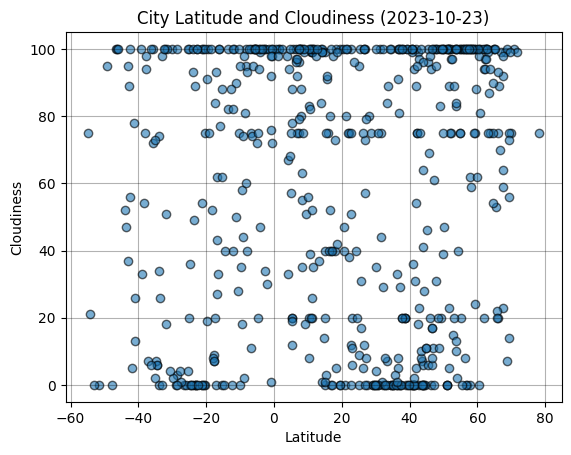

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],
            alpha = 0.6,
            edgecolors = "black")

# Incorporate the other graph properties
plt.grid(axis = "both", color = "black", alpha = 0.3)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude and Cloudiness ({current_date})")

# Save the figure
plt.savefig("output_data/Fig3(Lat vs Cloud).png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

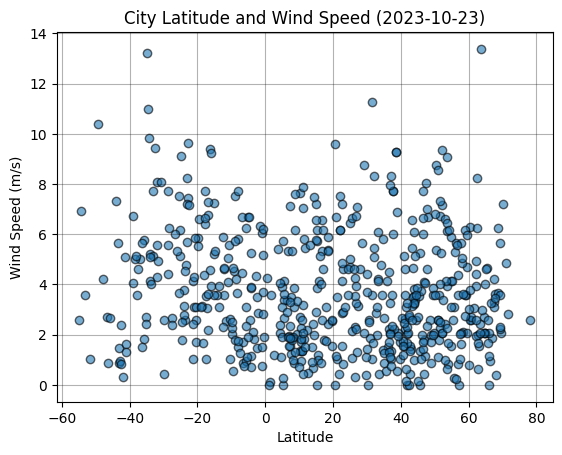

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],
            alpha = 0.6,
            edgecolors = "black")

# Incorporate the other graph properties
plt.grid(axis = "both", color = "black", alpha = 0.3)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude and Wind Speed ({current_date})")

# Save the figure
plt.savefig("output_data/Fig4(Lat vs Wind).png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plot
def lin_regress_plot (x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    # try sea scatter
    sea.scatterplot(x=x, y=y, 
                    alpha = 0.6,
                    edgecolor = "black")
    # sea regression overlay
    sea.lineplot(x=x, y=slope * x + intercept,
                color='red',
                alpha = 0.8)
    # show plot with formula and rval
    formula_text = f'Y = {slope:.2f} * X + {intercept:.2f}'
    r_val = f'r-squared = {rvalue:.2f}'
    plt.text(0.6, 0.91, formula_text, transform=plt.gca().transAxes, fontsize=10, color='green')
    plt.text(0.6, 0.85, r_val, transform=plt.gca().transAxes, fontsize=10, color='red')
    print(formula_text)
    print(r_val)

    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,letterkenny,54.9500,-7.7333,13.94,82,100,5.90,IE,1698067709
4,lompoc,34.6391,-120.4579,15.85,88,100,5.81,US,1698067611
6,orchard homes,46.8633,-114.0484,10.08,95,100,1.79,US,1698067710
8,vadso,70.0744,29.7487,2.49,80,75,7.20,NO,1698067710
12,mil'kovo,55.6078,37.7956,7.08,96,100,0.28,RU,1698067711


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,buala,-8.1450,159.5921,26.33,85,100,1.52,SB,1698067708
1,general pico,-35.6566,-63.7568,18.28,67,100,5.77,AR,1698067708
2,port-aux-francais,-49.3500,70.2167,1.77,95,95,10.38,TF,1698067709
5,puerto natales,-51.7236,-72.4875,10.25,62,0,1.03,CL,1698067709
7,grytviken,-54.2811,-36.5092,-2.75,62,21,6.92,GS,1698067710


###  Temperature vs. Latitude Linear Regression Plot

Y = -0.57 * X + 36.59
r-squared = -0.87


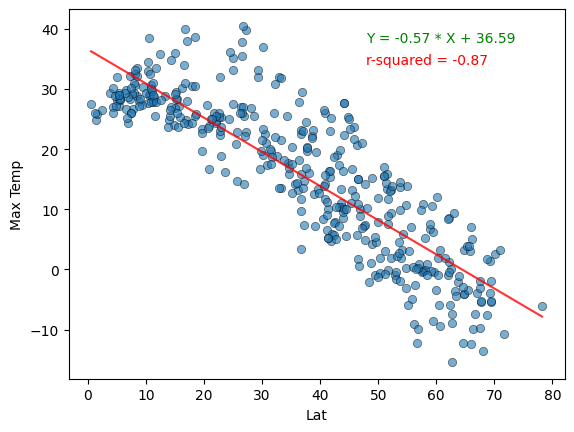

In [16]:
# Linear regression on Northern Hemisphere
lin_regress_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

Y = 0.42 * X + 32.24
r-squared = 0.74


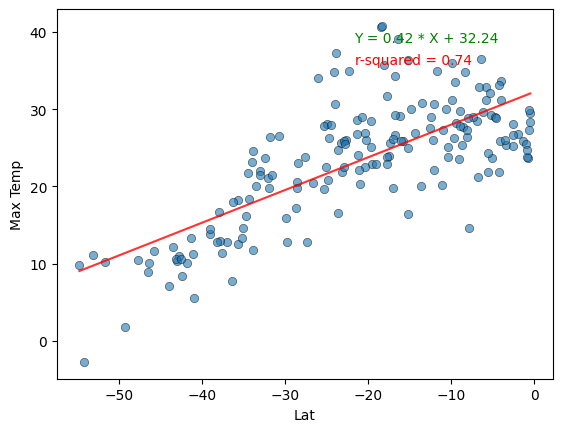

In [17]:
# Linear regression on Southern Hemisphere
lin_regress_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Linear relationship discussion:
Northern Hemisphere indicates that the temperature tends to decrease as you move away from the equator. The Southern Hemisphere plot includes that notion but in the opposite direction. The Southern Hemisphere plot indicates that the maximum temperature increases as you move toward the equator.

### Humidity vs. Latitude Linear Regression Plot

Y = 0.23 * X + 60.53
r-squared = 0.21


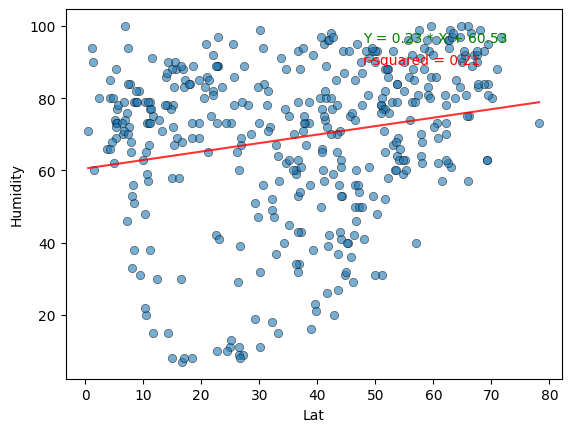

In [18]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

Y = -0.05 * X + 64.55
r-squared = -0.03


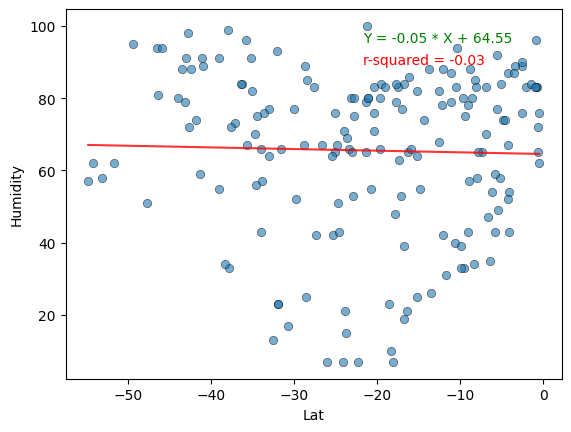

In [19]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

# Linear relationship discussion:
Based on the slope of the lines, there is not a strong correlation of humidity in either hemisphere, but that notion is surprising to me, given the previous plots with temperature. Although I need to learn more about the science of humidity, my keen guess would be to look at cloud coverage, proximity to the ocean or a large body of water, and local vegetation.

### Cloudiness vs. Latitude Linear Regression Plot

Y = 0.08 * X + 55.45
r-squared = 0.04


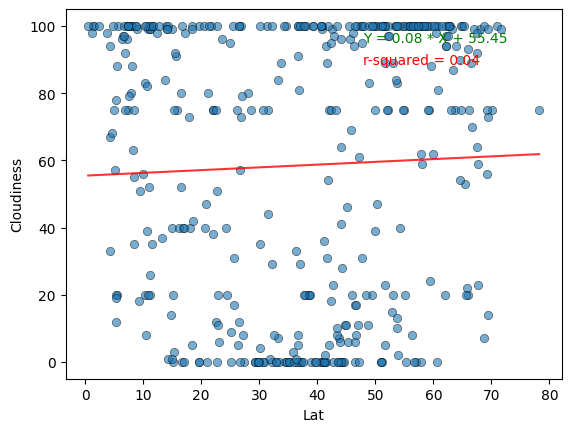

In [20]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

Y = 0.69 * X + 71.45
r-squared = 0.24


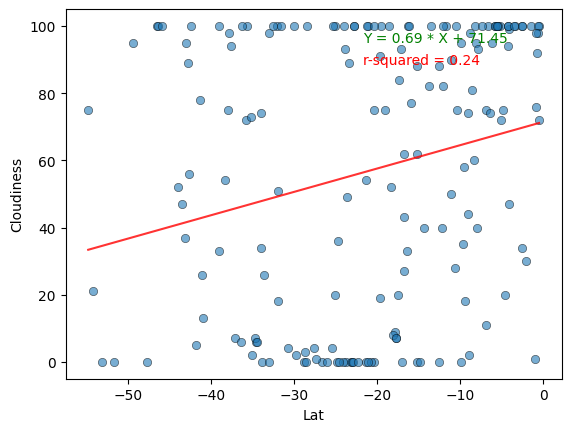

In [21]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

# Linear relationship discussion:
Cloud coverage isn't looking too hot regarding increasing or decreasing latitude in the northern and southern hemispheres. However, the residuals for the Southern Hemisphere show a higher degree of heteroscedasticity. Where cloud coverage appears to be more significant as you near the equator, you can string any of these plots up as an issue of multicausality.

### Wind Speed vs. Latitude Linear Regression Plot

Y = 0.00 * X + 3.19
r-squared = 0.04


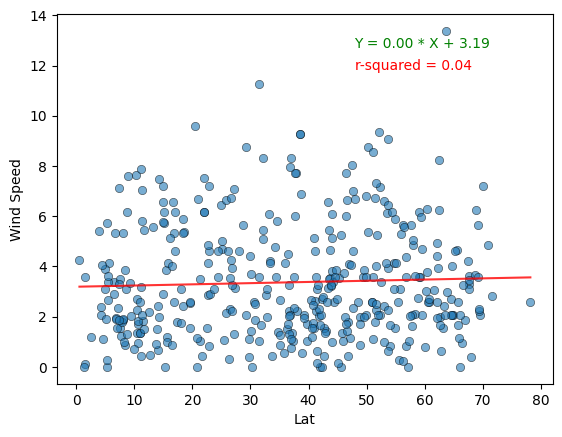

In [22]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

Y = -0.02 * X + 3.79
r-squared = -0.13


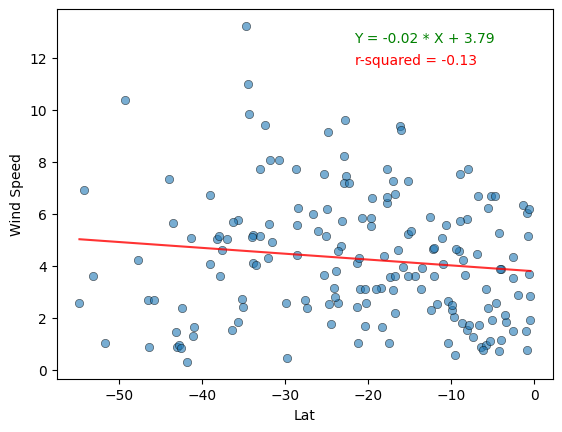

In [23]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

In [24]:
print(len(northern_hemi_df))
print(len(southern_hemi_df))

404
175


# Linear relationship discussion:
After reviewing all the plots, I realize that my segment of data for the Southern Hemisphere is lacking, and I'm wondering if it contributes to any disparity. Regardless my current indication is that latitude affects very little in terms of wind speed.